
Collision Severity in Seattle¶
Business Understanding
From January 2004 to May of 2020, there have been over 190 thousand recorded cases of collisions in Seattle alone. These include various types of vehicles such as Cars, Trucks, Motorcycles, Bicycles, and others.

In 2016 alone, the total number of road traffic deaths is estimated at 1.35 million and almost half of these deaths are coming from those with the least protection such as motorcyclists, cyclists, and pedestrians. At a global scope, road traffic injuries and crashes are estimated to be the eighth leading cause of death across all ages.

This analysis aims to determine the factors or attributes that might be contributing to these accidents and their severity level. This will help the Seattle residents to be aware of the attributes which may lead to accidents related to road accidents and how they can adjust or prepare once we know the attributes that may increase the risk of these accidents.

Source: https://www.who.int/gho/road_safety/mortality/en/
Data Understanding
The data to be used for this analysis is from the Traffic Records Group of the Seattle Department of Transportation, Traffic Management Division. This includes all types of collisions at the intersections and mid-blocks of a segment from January 2004 to May 2020.

The attributes to be used to determine the severity of the accidents are Weather, Road Condition, Light Condition, and whether the drivers are Under the Influence of Drugs or Alcohol.

The dependent variable for this analysis is the SEVERITYCODE with two possible values:

• 1 – Property Damage Only Collision
• 2 – Injury Collision

The independent variables for this analysis to classify and determine the severity of the accidents are the following:

• WEATHER – Weather condition during the time of the collision. WEATHER will have four classifications: Clear</i>, Raining</i>, Overcast</i>, and all other weather conditions (except Unknown) shall be grouped under Others</i>.
• ROADCOND – Condition of the road during the collision. ROADCOND will have three classifications: Dry</i>, Wet</i>, and all other road conditions (except Unknown) shall be grouped under Others</i>.
• LIGHTCOND – Light condition during the collision. LIGHTCOND will have three classifications: Daylight</i>, Dark with Street Lights On</i>, and all other conditions shall be grouped under Others</i>.
• UNDERINFL – Whether the driver of the vehicle was under the influence of drugs or alcohol.

These attributes are selected as the data has a lot of null and unknown values for the other attributes and these four attributes have a minimal number of unusable data.

Importing libraries to be used in the analysis
For this analysis, Pandas, Numpy, Matplotlib, Seaborn, Preprocessing and Sklearn libraries will be used for data processing, exploratory data analysis, visualization and modeling.




In [2]:
!pip3 install preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import f1_score, jaccard_score, log_loss, confusion_matrix


     |████████████████████████████████| 349 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 2.3 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367704 sha256=ef12a18e7728eee785d095f7f3fc8df8424a3b1f085fd585d2086531e5b35785
  Stored in directory: /home/omars/.cache/pip/wheels/d9/37/86/b5270b826e4b542bd6791005300c9d3864059901c7efc03545
Successfully built nltk


In [5]:
df = pd.read_csv('Data-Collisions.csv')
df.head()


/home/omars/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 38 columns]

In [6]:
df.describe().transpose()


count          mean           std           min  \
SEVERITYCODE    194673.0  1.298901e+00  4.577776e-01  1.000000e+00   
X               189339.0 -1.223305e+02  2.997605e-02 -1.224191e+02   
Y               189339.0  4.761954e+01  5.615664e-02  4.749557e+01   
OBJECTID        194673.0  1.084794e+05  6.264972e+04  1.000000e+00   
INCKEY          194673.0  1.410915e+05  8.663440e+04  1.001000e+03   
COLDETKEY       194673.0  1.412988e+05  8.698654e+04  1.001000e+03   
INTKEY           65070.0  3.755845e+04  5.174599e+04  2.380700e+04   
SEVERITYCODE.1  194673.0  1.298901e+00  4.577776e-01  1.000000e+00   
PERSONCOUNT     194673.0  2.444427e+00  1.345929e+00  0.000000e+00   
PEDCOUNT        194673.0  3.713920e-02  1.981499e-01  0.000000e+00   
PEDCYLCOUNT     194673.0  2.839120e-02  1.674128e-01  0.000000e+00   
VEHCOUNT        194673.0  1.920780e+00  6.310467e-01  0.000000e+00   
SDOT_COLCODE    194673.0  1.386777e+01  6.868755e+00  0.000000e+00   
SDOTCOLNUM      114936.0  7.972521e+06  2.553533e+06  1.007024e+06   
SEGLANEKEY      194673.0  2.694011e+02  3.315776e+03  0.000000e+00   
CROSSWALKKEY    194673.0  9.782452e+03  7.226926e+04  0.000000e+00   

                         25%           50%           75%           max  
SEVERITYCODE    1.000000e+00  1.000000e+00  2.000000e+00  2.000000e+00  
X              -1.223487e+02 -1.223302e+02 -1.223119e+02 -1.222389e+02  
Y               4.757596e+01  4.761537e+01  4.766366e+01  4.773414e+01  
OBJECTID        5.426700e+04  1.069120e+05  1.622720e+05  2.195470e+05  
INCKEY          7.038300e+04  1.233630e+05  2.033190e+05  3.314540e+05  
COLDETKEY       7.038300e+04  1.233630e+05  2.034590e+05  3.329540e+05  
INTKEY          2.866700e+04  2.997300e+04  3.397300e+04  7.575800e+05  
SEVERITYCODE.1  1.000000e+00  1.000000e+00  2.000000e+00  2.000000e+00  
PERSONCOUNT     2.000000e+00  2.000000e+00  3.000000e+00  8.100000e+01  
PEDCOUNT        0.000000e+00  0.000000e+00  0.000000e+00  6.000000e+00  
PEDCYLCOUNT     0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  
VEHCOUNT        2.000000e+00  2.000000e+00  2.000000e+00  1.200000e+01  
SDOT_COLCODE    1.100000e+01  1.300000e+01  1.400000e+01  6.900000e+01  
SDOTCOLNUM      6.040015e+06  8.023022e+06  1.015501e+07  1.307202e+07  
SEGLANEKEY      0.000000e+00  0.000000e+00  0.000000e+00  5.252410e+05  
CROSSWALKKEY    0.000000e+00  0.000000e+00  0.000000e+00  5.239700e+06

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [8]:
df.isna().sum()


SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [9]:
df_new = df[['SEVERITYCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]


In [10]:
df_new.drop(df_new[df_new.WEATHER == 'Unknown'].index, inplace = True)
df_new.drop(df_new[df_new.ROADCOND == 'Unknown'].index, inplace = True)
df_new.drop(df_new[df_new.LIGHTCOND == 'Unknown'].index, inplace = True)


/home/omars/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
df_new.dropna(inplace = True)


<ipython-input-11-8435a3118ee6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace = True)


In [12]:
df_new.isna().count()


SEVERITYCODE    170510
UNDERINFL       170510
WEATHER         170510
ROADCOND        170510
LIGHTCOND       170510
dtype: int64

In [13]:
df_new['SEVERITYCODE'].value_counts()


1    114659
2     55851
Name: SEVERITYCODE, dtype: int64

In [14]:
sev_1 = df_new.loc[df_new['SEVERITYCODE'] == 1].sample(n=55851, random_state = 0)
sev_2 = df_new.loc[df_new['SEVERITYCODE'] == 2]
data = sev_1.append(sev_2)
data['SEVERITYCODE'].value_counts()


2    55851
1    55851
Name: SEVERITYCODE, dtype: int64

In [15]:
data.head()


SEVERITYCODE UNDERINFL   WEATHER ROADCOND LIGHTCOND
46827              1         0  Overcast      Wet  Daylight
110397             1         N     Clear      Dry  Daylight
144688             1         N     Clear      Dry  Daylight
35712              1         0     Clear      Dry  Daylight
168040             1         N     Clear      Dry  Daylight

Binning some of the attributes
The purpose of this is to group together those minor observations within the attributes that will be used in the analysis

In [16]:
data.loc[(data['UNDERINFL'] == 'N'),'UNDERINFL'] = 0
data.loc[(data['UNDERINFL'] == '0'),'UNDERINFL'] = 0
data.loc[(data['UNDERINFL'] == 'Y'),'UNDERINFL'] = 1
data.loc[(data['UNDERINFL'] == '1'),'UNDERINFL'] = 1
data.loc[(~data['WEATHER'].isin(['Clear', 'Raining', 'Overcast'])),'WEATHER'] = 'Others'
data.loc[(~data['ROADCOND'].isin(['Wet', 'Dry'])),'ROADCOND'] = 'Others'
data.loc[(~data['LIGHTCOND'].isin(['Daylight', 'Dark - Street Lights On'])),'LIGHTCOND'] = 'Others'

Assigning categorical¶


In [18]:
label_encoder = preprocessing.LabelEncoder()
data['WEATHER'] = label_encoder.fit_transform(data['WEATHER'])
data['ROADCOND'] = label_encoder.fit_transform(data['ROADCOND'])
data['LIGHTCOND'] = label_encoder.fit_transform(data['LIGHTCOND'])
data = data.astype('int64')
data.head()


SEVERITYCODE  UNDERINFL  WEATHER  ROADCOND  LIGHTCOND
46827              1          0        2         2          1
110397             1          0        0         0          1
144688             1          0        0         0          1
35712              1          0        0         0          1
168040             1          0        0         0          1

In [19]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 111702 entries, 46827 to 194671
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   SEVERITYCODE  111702 non-null  int64
 1   UNDERINFL     111702 non-null  int64
 2   WEATHER       111702 non-null  int64
 3   ROADCOND      111702 non-null  int64
 4   LIGHTCOND     111702 non-null  int64
dtypes: int64(5)
memory usage: 5.1 MB


Data Visuallization


<AxesSubplot:xlabel='UNDERINFL', ylabel='count'>

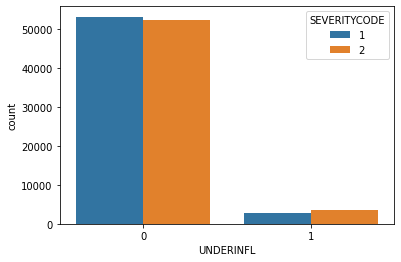

In [20]:
sns.countplot(x = 'UNDERINFL', hue = 'SEVERITYCODE', data = data, order = data['UNDERINFL'].value_counts().index)

<AxesSubplot:xlabel='WEATHER', ylabel='count'>

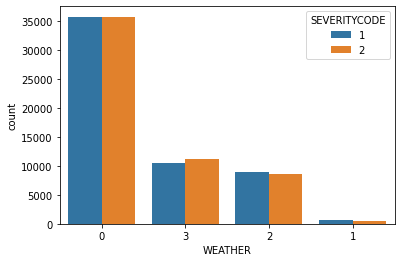

In [21]:
sns.countplot(x = 'WEATHER', hue = 'SEVERITYCODE', data = data, order = data['WEATHER'].value_counts().index)

<AxesSubplot:xlabel='ROADCOND', ylabel='count'>

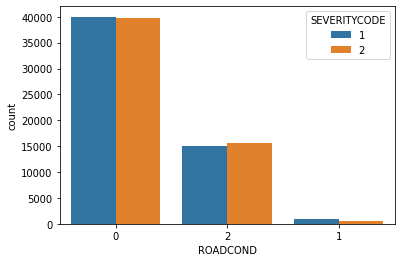

In [22]:
sns.countplot(x = 'ROADCOND', hue = 'SEVERITYCODE', data = data, order = data['ROADCOND'].value_counts().index)


<AxesSubplot:xlabel='LIGHTCOND', ylabel='count'>

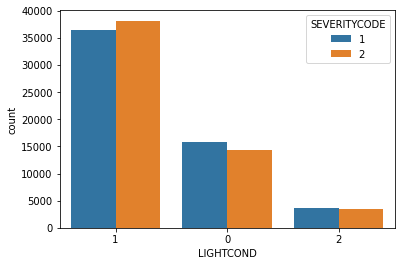

In [23]:
sns.countplot(x = 'LIGHTCOND', hue = 'SEVERITYCODE', data = data, order = data['LIGHTCOND'].value_counts().index)


In [24]:
X = data.drop('SEVERITYCODE', axis = 1)
y = data[['SEVERITYCODE']]

In [25]:

from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:]

array([[-0.24183825,  0.87673266,  1.6163231 ,  0.38463149],
       [-0.24183825, -0.72454911, -0.62847073,  0.38463149],
       [-0.24183825, -0.72454911, -0.62847073,  0.38463149],
       ...,
       [-0.24183825, -0.72454911, -0.62847073,  0.38463149],
       [-0.24183825, -0.72454911, -0.62847073,  0.38463149],
       [-0.24183825, -0.72454911, -0.62847073,  2.24358386]])

In [ ]:
!git add .
!git commit -m ""